In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf



In [95]:
start = '2020-01-01'
end = '2024-01-04'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [96]:
data.reset_index(inplace=True)

In [97]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,67.077499,68.406998,67.077499,68.368500,68.290787,28132000
1,2020-01-03,67.392998,68.625000,67.277199,68.032997,67.955666,23728000
2,2020-01-06,67.500000,69.824997,67.500000,69.710503,69.631264,34646000
3,2020-01-07,69.897003,70.149498,69.518997,69.667000,69.587814,30054000
4,2020-01-08,69.603996,70.579002,69.542000,70.216003,70.136192,30560000
...,...,...,...,...,...,...,...
1003,2023-12-27,142.830002,143.320007,141.050995,141.440002,141.279236,17288400
1004,2023-12-28,141.850006,142.270004,140.828003,141.279999,141.119415,12192500
1005,2023-12-29,140.679993,141.434998,139.899994,140.929993,140.769806,14872700
1006,2024-01-02,139.600006,140.615005,137.740005,139.559998,139.401367,20071900


In [98]:
ma_100_days = data.Close.rolling(100).mean()

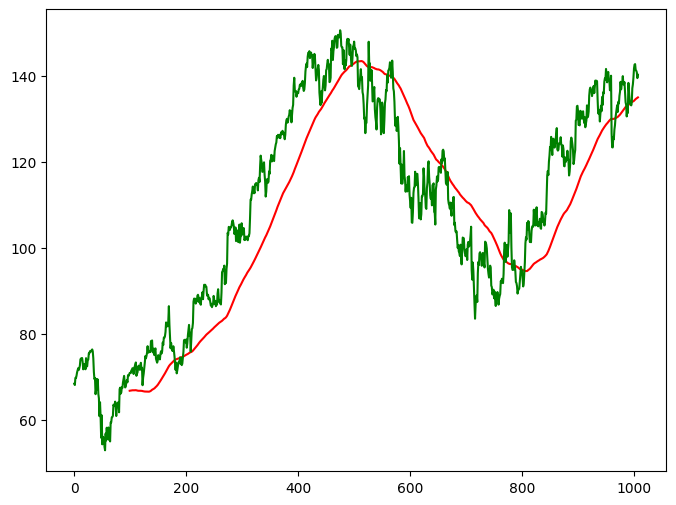

In [99]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [100]:
ma_200_days = data.Close.rolling(200).mean()

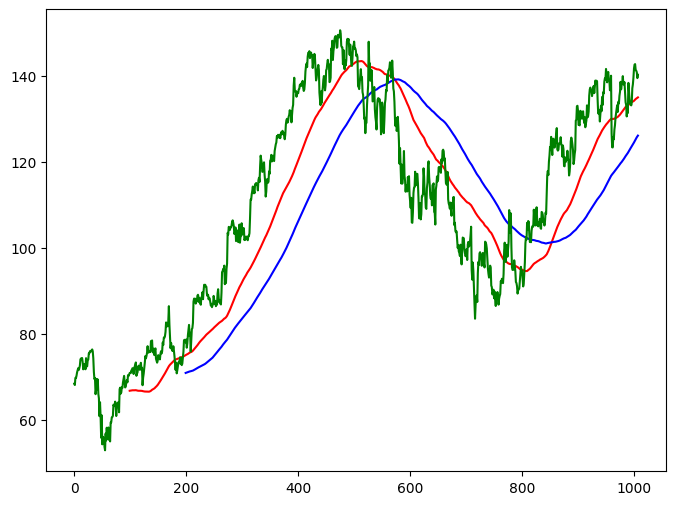

In [101]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [102]:
data.dropna(inplace=True)

In [103]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [104]:
data_train.shape[0]

806

In [105]:
data_test.shape[0]

202

In [106]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [107]:
data_train_scale = scaler.fit_transform(data_train)

In [108]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [109]:
x, y = np.array(x), np.array(y)

In [110]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [111]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [112]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [113]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - loss: 0.2293
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - loss: 0.0302
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - loss: 0.0206
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - loss: 0.0163
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - loss: 0.0126
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 178ms/step - loss: 0.0131
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 241ms/step - loss: 0.0150
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - loss: 0.0129
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - loss: 0.0128
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 160ms/step - loss: 0.0105
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - loss: 0.0129
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - loss: 0.0199
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - loss: 0.0132
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - loss: 0.0141
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - lo

In [114]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [115]:
pas_100_days = data_train.tail(100)

In [116]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [117]:
data_test_scale  =  scaler.fit_transform(data_test)


In [118]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [119]:
y_predict = model.predict(x)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step


In [120]:
scale =1/scaler.scale_

In [121]:
y_predict = y_predict*scale

In [122]:
y = y*scale

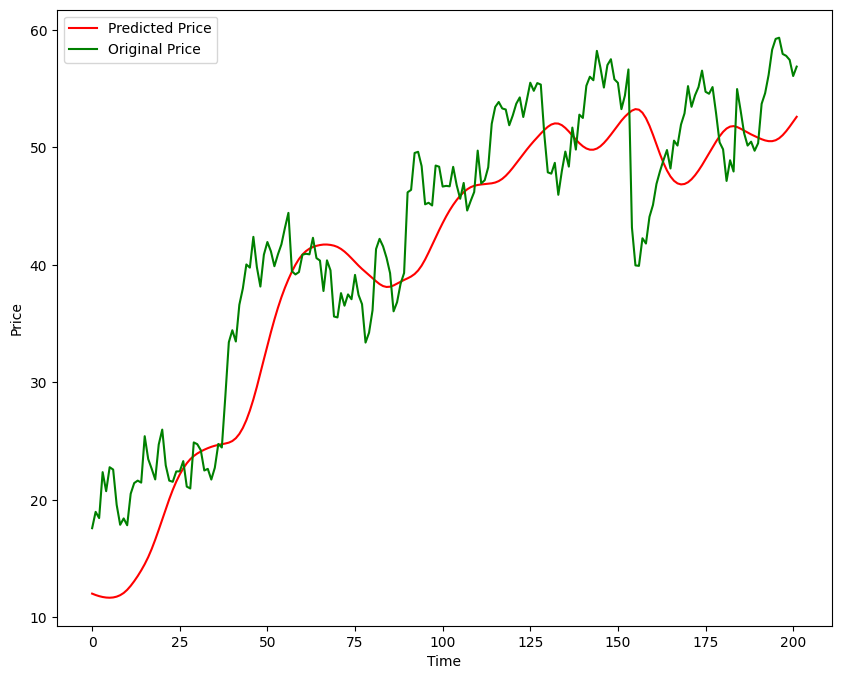

In [123]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [124]:
model.save('Stock Predictions Model.keras')

In [127]:
if isinstance(ma_100_days, pd.Series):
    ma_100_days = ma_100_days.to_frame(name='Close')

# Ensure 'last_100_days' DataFrame contains the necessary columns ('Close' column)
# Assuming 'ma_100_days' is now a DataFrame
if 'Close' in ma_100_days.columns:
    last_100_days_values = ma_100_days['Close'].values.reshape(-1, 1)

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(last_100_days_values)

    # Reshape the data
    X_test = np.array([scaled_data])
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Make predictions
    predicted_price = model.predict(X_test)

    # Inverse transform the predicted price
    predicted_price = scaler.inverse_transform(predicted_price)

    # Print the predicted price
    print("Predicted price:", predicted_price[0][0])
else:
    print("Error: 'Close' column not found in DataFrame")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted price: nan
